# Evaluating Home Field Advantage During the 2018 Regular NFL Season

## Query NFL data from MySql and put into Pandas to run statistics

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import mysql.connector
import config

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = 'sports'
)
cursor = cnx.cursor(buffered=True)

In [5]:
cursor.execute("""
SELECT
    *
FROM
    sports.nfl
;
""")

nfl_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'week',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
    'away_team_moneyline',
    'home_team_moneyline',
    'spread'
]

df = pd.DataFrame(nfl_data,columns=columns).set_index('game_id')
df['home_pt_diff'] = 0
df.head()

,month,week,away_team,away_team_score,home_team,home_team_score,away_team_moneyline,home_team_moneyline,spread,home_pt_diff
game_id,,,,,,,,,,
201810101,09,1,WAS,38,ARI,15,-161,-171,3.7,0
201810103,09,1,BUF,7,BAL,74,-163,-169,-11.8,0
201810105,09,1,DAL,13,CAR,25,172,-188,-4.0,0
201810108,09,1,PIT,33,CLE,33,166,-182,8.7,0
201810110,09,1,SEA,38,DEN,43,171,-186,-4.7,0


In [6]:
def home_pt_diff(df_):
    df_['home_pt_diff'] = df_['home_team_score'] - df_['away_team_score']
    return df_['home_pt_diff']

In [7]:
df['home_pt_diff'] = df.apply(home_pt_diff, axis=1)
df.head()

,month,week,away_team,away_team_score,home_team,home_team_score,away_team_moneyline,home_team_moneyline,spread,home_pt_diff
game_id,,,,,,,,,,
201810101,09,1,WAS,38,ARI,15,-161,-171,3.7,-23
201810103,09,1,BUF,7,BAL,74,-163,-169,-11.8,67
201810105,09,1,DAL,13,CAR,25,172,-188,-4.0,12
201810108,09,1,PIT,33,CLE,33,166,-182,8.7,0
201810110,09,1,SEA,38,DEN,43,171,-186,-4.7,5


In [8]:
df['home_pt_diff'].describe()

count    256.000000
mean       3.531250
std       22.428776
min      -59.000000
25%      -10.250000
50%        5.000000
75%       16.000000
max       67.000000
Name: home_pt_diff, dtype: float64

In [9]:
mu = df['home_pt_diff'].mean()
sigma = df['home_pt_diff'].std()
z_scores = [(df['home_pt_diff'].iloc[i] - mu) / sigma for i in range(df['home_pt_diff'].shape[0])]

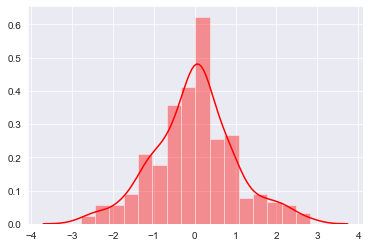

In [11]:
sns.distplot(z_scores, bins='auto', color='r');

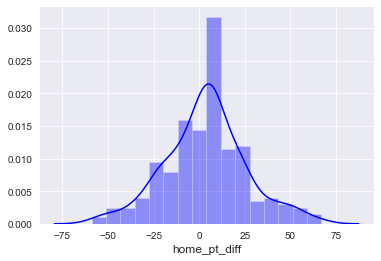

In [132]:
sns.distplot(df['home_pt_diff'], bins='auto', color='b');

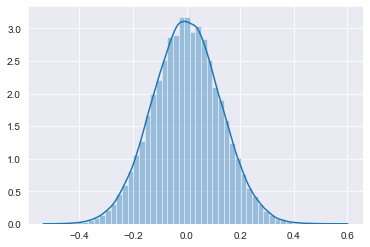

In [12]:
samples = [np.random.choice(z_scores, replace=False, size=50)
           for i in range(10**5)]
sns.distplot([np.mean(i) for i in samples]);

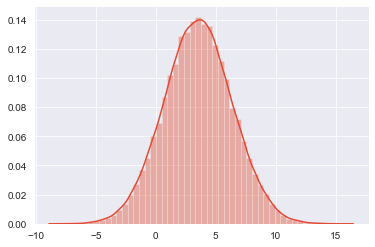

In [134]:
samples = [np.random.choice(df['home_pt_diff'], replace=False, size=50)
           for i in range(10**5)]
sns.distplot([np.mean(i) for i in samples]);

In [139]:
x_bar = np.mean(samples)
s_bar = np.std(samples)

print(f'Sampling Mean: {x_bar}; Sampling Std Dev: {s_bar}')

Sampling Mean: 3.523827; Sampling Std Dev: 22.392817944021058
